In [1]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In [2]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


pip install tensorflow-gpu==2.10.1

In [3]:
pip cache purge

Files removed: 8
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show tensorflow-gpu scikit-learn

Name: tensorflow-gpu
Version: 2.10.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\salvi\appdata\roaming\python\python310\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
---
Name: scikit-learn
Version: 1.1.3
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\salvi\appdata\roaming\python\python310\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: pmdarima
Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

C:\Users\salvi\AppData\Roaming\Python\Python310\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [6]:
os.path.join('jigsaw-toxic-comment-classification-challenge', 'train.csv', 'train.csv')

'jigsaw-toxic-comment-classification-challenge\\train.csv\\train.csv'

In [7]:
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge', 'train.csv'))

In [8]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [10]:
df.iloc[4]['comment_text']

"You, sir, are my hero. Any chance you remember what page that's on?"

In [11]:
df[df['toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [12]:
df[df.columns[2:]].iloc[4]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 4, dtype: int64

## 1. Preprocess

In [13]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      1.4.0
aiofiles                     23.2.1
annotated-types              0.7.0
anyio                        3.6.1
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
async-generator              1.10
attrs                        21.4.0
Babel                        2.10.1
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       6.2.0
blis                         0.7.10
cachetools                   5.3.0
catalogue                    2.0.9
certifi                      2021.10.8
cffi                         1.15.0
chardet                      5.2.0
charset-normalizer           2.0.12
chess                        1.11.1
chex                         0.1.88
click                        8.1.3
cmdstanpy                    1.1.0
colorama                     0.4

In [14]:
from tensorflow.keras.layers import TextVectorization

In [15]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [16]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [17]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [18]:
X #comments

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [19]:
y  #labels

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [20]:
MAX_FEATURES = 200000  #number of words in the vocab

In [21]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [22]:
type(X.values)

numpy.ndarray

In [23]:
vectorizer.adapt(X.values)

In [24]:
#Example:
vectorizer('hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([286, 261, 305,   9, 275], dtype=int64)>

In [25]:
vectorized_text = vectorizer(X.values)

In [26]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  643,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2506, ...,     0,     0,     0],
       [  425,   440,    70, ...,     0,     0,     0],
       ...,
       [32141,  7329,   383, ...,     0,     0,     0],
       [    5,    12,   533, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [27]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [28]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [29]:
batch_X.shape

(16, 1800)

In [30]:
batch_y.shape

(16, 6)

In [31]:
len(dataset) #batches and NOT samples since we batched up the data 

9974

In [32]:
len(dataset) * 7

69818

In [33]:
train = dataset.take(int(len(dataset)*.7))  #training - 70% of the length of the dataset
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))  #validation - 20% of the total dataset, we first skip the 70% of the training dataset we have already taken in the previous line
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))   #test - 10% of the total dataset

In [34]:
len(train)

6981

In [35]:
len(val)

1994

In [36]:
len(test)

997

In [37]:
train_generator = train.as_numpy_iterator()

In [38]:
train_generator.next()

(array([[   8,   65,    7, ...,    0,    0,    0],
        [1100,  712,  756, ...,    0,    0,    0],
        [  46, 1364,   31, ...,    0,    0,    0],
        ...,
        [1828,    8,   19, ...,    0,    0,    0],
        [   8,  104,  189, ...,    0,    0,    0],
        [ 678,  684, 9928, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0]], dtype=int64))

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

-Birdirectional layer is going to be a modifier and allow us to pass the features or the values from our LSTM outputs across the board as we are passing through our sequences

-Dropout is a method of regularization 

-Dense layer is where we connect the layers

In [40]:
model = Sequential()
# Create new embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
#First we have to specifiy how many different types of embeddings we need which will be the words + 1 and the embeddings will be 32 value in length 

#Next we create the LSTM Layer, it will have 32 different units and activation function will be tanh, because the GPU accelartion required by LSTM layer is tanh
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [41]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [43]:
history = model.fit(train, epochs=1, validation_data = val)

6981/6981 [==============================] - 9416s 1s/step - loss: 0.0629 - val_loss: 0.0449


In [44]:
history.history

{'loss': [0.06290403753519058], 'val_loss': [0.04487498104572296]}

In [45]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

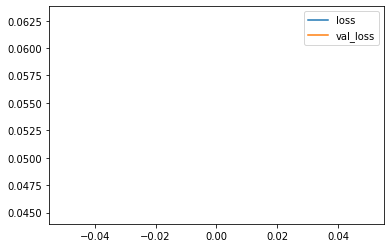

In [46]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

## Make Predictions

In [47]:
input_text = vectorizer("You freaking suck!")

In [48]:
batch = test.as_numpy_iterator().next()

In [49]:
np.expand_dims(input_text,0)

array([[   7, 7113,  396, ...,    0,    0,    0]], dtype=int64)

Store the result inside the variable called 'res' and use model.predict to make predictions

In [50]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 1s/step


array([[0.9981248 , 0.4590107 , 0.9770595 , 0.0708948 , 0.89224434,
        0.15438332]], dtype=float32)

In [51]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [52]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 107ms/step


In [53]:
(res > 0.5).astype(int)

array([[1, 0, 1, 0, 1, 0]])

In [54]:
batch = test.as_numpy_iterator().next()

In [55]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [56]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 184ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [57]:
res.shape

(1, 6)

## Evaluate Model

In [58]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy, Accuracy

In [59]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

first we are going to loop through every single batch data in the pipeline

In [60]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 199ms/step


1/1 [==============================] - 0s 228ms/step


1/1 [==============================] - 0s 185ms/step


1/1 [==============================] - 0s 214ms/step


1/1 [==============================] - 0s 190ms/step


1/1 [==============================] - 0s 166ms/step


1/1 [==============================] - 0s 289ms/step


In [61]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.7732148170471191, Recall:0.717985212802887, Accuracy:0.46740221977233887


## Gradio App

In [62]:
!pip install gradio jinja2

Defaulting to user installation because normal site-packages is not writeable


In [63]:
import gradio as gr

In [64]:
pip install typing_extensions --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [65]:
pip show typing_extensions

Name: typing_extensions
Version: 4.12.2
Summary: Backported and Experimental Type Hints for Python 3.8+
Home-page: 
Author: 
Note: you may need to restart the kernel to use updated packages.


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\salvi\AppData\Roaming\Python\Python310\site-packages\pip\_internal\utils\logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "C:\Users\salvi\AppData\Roaming\Python\Python310\site-packages\pip\_vendor\rich\console.py", line 1673, in print
    with self:
  File "C:\Users\salvi\AppData\Roaming\Python\Python310\site-packages\pip\_vendor\rich\console.py", line 865, in __exit__
    self._exit_buffer()
  File "C:\Users\salvi\AppData\Roaming\Python\Python310\site-packages\pip\_vendor\rich\console.py", line 823, in _exit_buffer
    self._check_buffer()
  File "C:\Users\salvi\AppData\Roaming\Python\Python310\site-packages\pip\_vendor\rich\console.py", line 2027, in _check_buffer
    legacy_windows_render(buffer, LegacyWindowsTerm(self.file))
  File "C:\Users\salvi\AppData\Roaming\Python\Python310\site-packages\pip\_vendor\rich\_windows_renderer.py", line 19, 

In [66]:
import gradio as gr

In [67]:
import tensorflow as tf

In [68]:
model.save('toxicity.h5')

In [69]:
model = tf.keras.models.load_model('toxicity.h5')

In [90]:
input_str = vectorizer("i hate you")

In [91]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 0s 157ms/step


In [92]:
res

array([[0.7461309 , 0.02197614, 0.27301413, 0.01946667, 0.35529423,
        0.03900456]], dtype=float32)

In [93]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [94]:
res

array([[0.7461309 , 0.02197614, 0.27301413, 0.01946667, 0.35529423,
        0.03900456]], dtype=float32)

In [95]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [98]:
import gradio as gr

interface = gr.Interface(
    fn=score_comment,
    inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
    outputs='text'
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 149ms/step
